# Getting Started in Machine Learning
### Chapter 11: Evaluating Binary Classifiers

This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## load mpg file 

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


2016 average fuel economy is 24.7 mpg
https://www.reuters.com/article/us-autos-emissions/u-s-vehicle-fuel-economy-rises-to-record-24-7-mpg-epa-idUSKBN1F02BX
downloaded 14 Dec 2018

## redo single variable logistic regression vs weight

In [3]:
mpg2016=24.7

In [4]:
weight=data["weight"]
mpg=data["mpg"]

X=np.array(weight).reshape(-1,1)
Y=np.array([1 if z<mpg2016 else 0 for z in mpg])

In [5]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split

In [6]:
XTRAIN,XTEST, YTRAIN, YTEST=train_test_split(X,Y)

In [7]:
r=LR().fit(XTRAIN,YTRAIN)
b=r.coef_[0,0]
a=r.intercept_[0]
x0=-a/b
print("a (intercept)=",a)
print("b (slope)=",b)
print("x0 (50% point)=",x0)

a (intercept)= -4.622294445086468
b (slope)= 0.0017822451262273832
x0 (50% point)= 2593.523403186877


## make a prediction on the test set and evaluate confusion matrix

In [8]:
YP=r.predict(XTEST)
confusion_matrix(YTEST,YP)

array([[37,  5],
       [ 8, 48]])

## calculate probabilities

### plot ROC curve

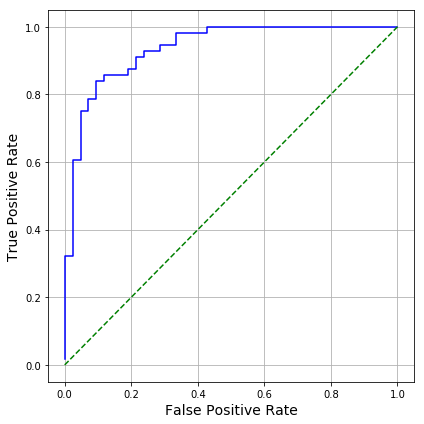

In [9]:
probs=r.predict_proba(XTEST)[:,1]
fpr, tpr, threshold = roc_curve(YTEST,probs)
plt.plot(fpr,tpr, c="blue")
plt.plot([0,1],[0,1],c="green",ls="--")

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("ROC-curve-gas-guzzler-logistic.pdf")

In [10]:
from scipy import interpolate

In [11]:
x=threshold
y=np.vstack([fpr,tpr])
f=interpolate.interp1d(x,y)

In [12]:
print(threshold)

[0.97451273 0.91120694 0.88252573 0.87648282 0.8723735  0.74834428
 0.74327631 0.6349114  0.63325733 0.60511071 0.59097366 0.54464923
 0.51847195 0.50288569 0.48328725 0.47839331 0.46950652 0.45356263
 0.42939749 0.41505085 0.40384675 0.38469594 0.3671373  0.36300619
 0.34266234 0.33945805 0.31398459 0.30446773 0.30070672 0.29697234
 0.2469704  0.23683951 0.15664945]


In [13]:
tvals=np.arange(.2,1,.1)
xyvals=f(tvals)
xvals,yvals=xyvals

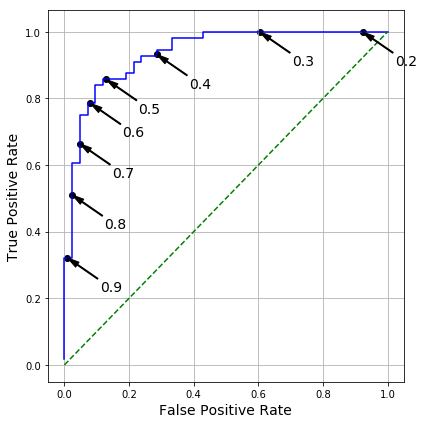

In [14]:
plt.plot(fpr,tpr, c="blue")
plt.plot([0,1],[0,1],c="green",ls="--")
plt.scatter(xvals,yvals, c="k")
for t,x,y in zip(tvals,xvals,yvals):
    plt.annotate(str(round(t,1)),(x,y),xytext=(x+.1,y-.1),
                fontsize=14,
                arrowprops={"width":1.0, "facecolor":"black",
                           "shrink":.0, "headwidth":6})

plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.grid()
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("Annotated-ROC-curve-gas-guzzler-logistic.pdf")

# Implement ROC Curve from scratch

In [15]:
def ROC(Y,Prob):
    if (len(Y)!=len(Prob)):
        print("Length mismatch")
        return([])
    
    P=sum(Y); N=len(Y)-P

    if (P<1) or (N<1):
        print("There must be both postive and negative examples")
        return([])
    
    py_pairs = sorted(zip(Prob, Y), reverse=True)

    FP=0; TP=0
    ROC_CURVE=[]
    pprev=float("-inf")
    
    for p,y in py_pairs:
        if p != pprev:
            ROC_CURVE.append([FP/N, TP/P])
            pprev=p
        if y>0:
            TP+=1
        else:
            FP+=1
     
    ROC_CURVE.append([FP/N, TP/P])
    return(ROC_CURVE)

In [16]:
## demonstrate our own ROC curve

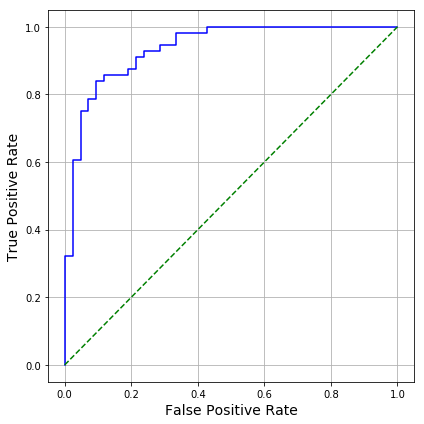

In [17]:
FPR,TPR=zip(*ROC(YTEST,probs))
plt.plot(FPR,TPR,c="blue")
plt.grid()
plt.plot([0,1],[0,1],c="green",ls="--")
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
fig=plt.gcf()
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig("ROC-CURVE-GAS-GUZZLER-LOGISTIC-REGRESSION-MODEL.pdf")


## demonstrate how to implement confusion matrix from scratch

In [18]:
def ConfMat(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    M = np.array([[TN,FP],[FN,TP]])
    return M
ConfMat(YTEST,YP)

array([[37,  5],
       [ 8, 48]])

In [19]:
confusion_matrix(YTEST,YP) # this is sklearn confusion matrix

array([[37,  5],
       [ 8, 48]])

# demonstrate how to calculate various metrics from scratch and compare to sklearn implementations

In [20]:
from sklearn.metrics import recall_score, precision_score, \
 f1_score,roc_auc_score, accuracy_score,precision_recall_fscore_support

def Metrics(OBS,PRED):
    OPS=list(zip(OBS,PRED))
    TP = sum([(O==1) and (P==1) for O,P in OPS])
    TN = sum([(O==0) and (P==0) for O,P in OPS])
    FP = sum([(P==1) and (O==0) for O,P in OPS])
    FN = sum([(P==0) and (O==1) for O,P in OPS])   
    P = sum(OBS)
    N = len(OBS)-P
    TPR = TP/P
    TNR = TN/N
    Specificity = TN/(FP+TN)
    Accuracy = (TP+TN)/(P+N)
    Precision = TP/(TP+FP)
    F=2/(1/Precision+1/TPR)
    return(TPR, TNR, Specificity, Accuracy, Precision,F)
TPR,TNR,Spec,Acc,Prec,F=Metrics(YTEST,YP)
print("TPR =         ",round(TPR,3),"sklearn recall_score=",
     round(recall_score(YTEST,YP),3))
print("TNR =         ",round(TNR,3))
print("Specificity = ",round(Spec,3))
print("Accuracy =    ",round(Acc,3),"sklearn accuracy_score=",
      round(accuracy_score(YTEST,YP),3))
print("Precision =   ",round(Prec,3),"sklearn precision_score=",
     round(precision_score(YTEST,YP),3))
print("F =           ",round(F,3),"sklearn f1_score=",
     round(f1_score(YTEST,YP),3))

TPR =          0.857 sklearn recall_score= 0.857
TNR =          0.881
Specificity =  0.881
Accuracy =     0.867 sklearn accuracy_score= 0.867
Precision =    0.906 sklearn precision_score= 0.906
F =            0.881 sklearn f1_score= 0.881


## calculate area under the ROC curve

#### and compare with SKLEARN version

In [21]:
roc_auc_score(YTEST,probs)

0.9366496598639455

In [22]:
FPR,TPR=zip(*ROC(YTEST,probs))

In [23]:
def TRAP(xvals, yvals):
    XLEFT = xvals[:-1]; XRIGHT= xvals[1:]
    YLEFT = yvals[:-1]; YRIGHT= yvals[1:]
    DX = XRIGHT-XLEFT
    print(sum(YLEFT*DX))
    return(sum(0.5*(YLEFT+YRIGHT)*DX))
TRAP(np.array(FPR), np.array(TPR))

0.9366496598639455


0.9366496598639455

In [24]:
from sklearn.metrics import auc

In [25]:
auc(FPR,TPR)

0.9366496598639457

# demonstrate ROC operation

In [26]:
def ROCDEMO(Y,Prob):
    if (len(Y)!=len(Prob)):
        print("Length mismatch")
        return([])
    
    P=sum(Y)
    N=len(Y)-P

    if (P<1) or (N<1):
        print("There must be both postive and negative examples")
        return([])
    
    py_pairs = sorted(zip(Prob, Y), reverse=True)

    FP=0; TP=0
    ROC_CURVE=[]
    pprev=float("-inf")
    
    print("    p Y FP TP   FPR   TPR")  
    print("----- - -- -- ----- -----")
    for p,y in py_pairs:
        if p != pprev:
            ROC_CURVE.append([FP/N, TP/P])
            pprev=p
        if y>0:
            TP+=1
        else:
            FP+=1
        print("%3.3f %1d %2d %2d %3.3f %3.3f" %(p,y,FP,TP,FP/N,TP/P))

     
    ROC_CURVE.append([FP/N, TP/P])
    return(ROC_CURVE)

FPR,TPR=zip(*ROCDEMO(YTEST, probs))
#plt.plot(FPR,TPR)

    p Y FP TP   FPR   TPR
----- - -- -- ----- -----
0.975 1  0  1 0.000 0.018
0.966 1  0  2 0.000 0.036
0.963 1  0  3 0.000 0.054
0.960 1  0  4 0.000 0.071
0.959 1  0  5 0.000 0.089
0.958 1  0  6 0.000 0.107
0.952 1  0  7 0.000 0.125
0.949 1  0  8 0.000 0.143
0.945 1  0  9 0.000 0.161
0.943 1  0 10 0.000 0.179
0.940 1  0 11 0.000 0.196
0.939 1  0 12 0.000 0.214
0.936 1  0 13 0.000 0.232
0.932 1  0 14 0.000 0.250
0.930 1  0 15 0.000 0.268
0.920 1  0 16 0.000 0.286
0.919 1  0 17 0.000 0.304
0.911 1  0 18 0.000 0.321
0.883 0  1 18 0.024 0.321
0.876 1  1 19 0.024 0.339
0.872 1  1 20 0.024 0.357
0.872 1  1 21 0.024 0.375
0.871 1  1 22 0.024 0.393
0.868 1  1 23 0.024 0.411
0.864 1  1 24 0.024 0.429
0.860 1  1 25 0.024 0.446
0.859 1  1 26 0.024 0.464
0.818 1  1 27 0.024 0.482
0.815 1  1 28 0.024 0.500
0.814 1  1 29 0.024 0.518
0.803 1  1 30 0.024 0.536
0.802 1  1 31 0.024 0.554
0.795 1  1 32 0.024 0.571
0.790 1  1 33 0.024 0.589
0.748 1  1 34 0.024 0.607
0.743 0  2 34 0.048 0.607
0.726 1  2 3